In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
# plt.rcParams['figure.dpi'] = 300

In [ ]:
from preprocessing import *
from helper import *

Number of routes after scraping: 30642
Number of routes after cleaning: 25099


In [ ]:
# Display MB image

# show_image()

In [ ]:
# display example of a route

# r = {'start': [[0,0]], 'mid': [[2,2], [6,6]], 'end': [[0,17],[4,17]]}
# display_route(r)

In [ ]:
# grade map
print(grade_map)

{'6B': 0, '6B+': 0, '6C': 1, '6C+': 1, '7A': 2, '7A+': 3, '7B': 4, '7B+': 4, '7C': 5, '7C+': 6, '8A': 7, '8A+': 8, '8B': 9}


## Distribution of grades

In [ ]:
# get a list of all grades
all_grades = []
for key, item in mb_2016.items():
    all_grades.append(item['grade'] + 4)

all_grades_count = []
all_grades_percentages = []
for i in range(4, 14):
    n = all_grades.count(i)
    all_grades_count.append(n)
    all_grades_percentages.append(n*100/len(all_grades))

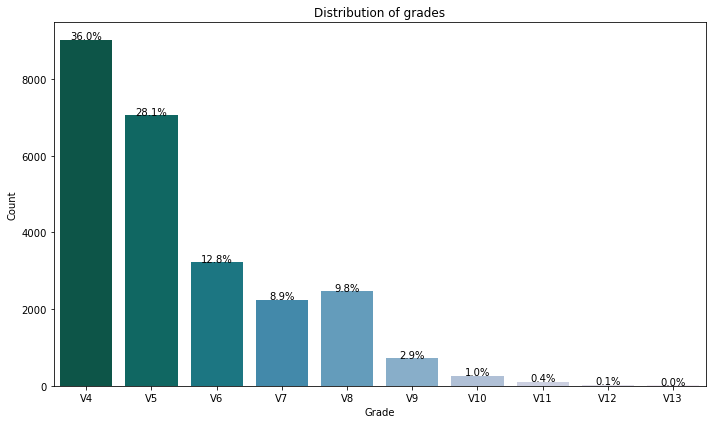

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
x = ['V' + str(grade) for grade in range(4, 14)]
y = all_grades_count
percentage = all_grades_percentages
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
ax.set(xlabel='Grade', ylabel='Count', title = 'Distribution of grades')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

## Heat Maps

In [ ]:
mb_2016_grades = {}
for key in mb_2016:
    mb_2016_grades[key] = mb_2016[key]['grade']

In [ ]:
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4_5 = heat_matrix(mb_2016, [0, 1])
heat_v6_9 = heat_matrix(mb_2016, [2, 3, 4, 5])
heat_v10_13= heat_matrix(mb_2016, [6, 7, 8, 9])

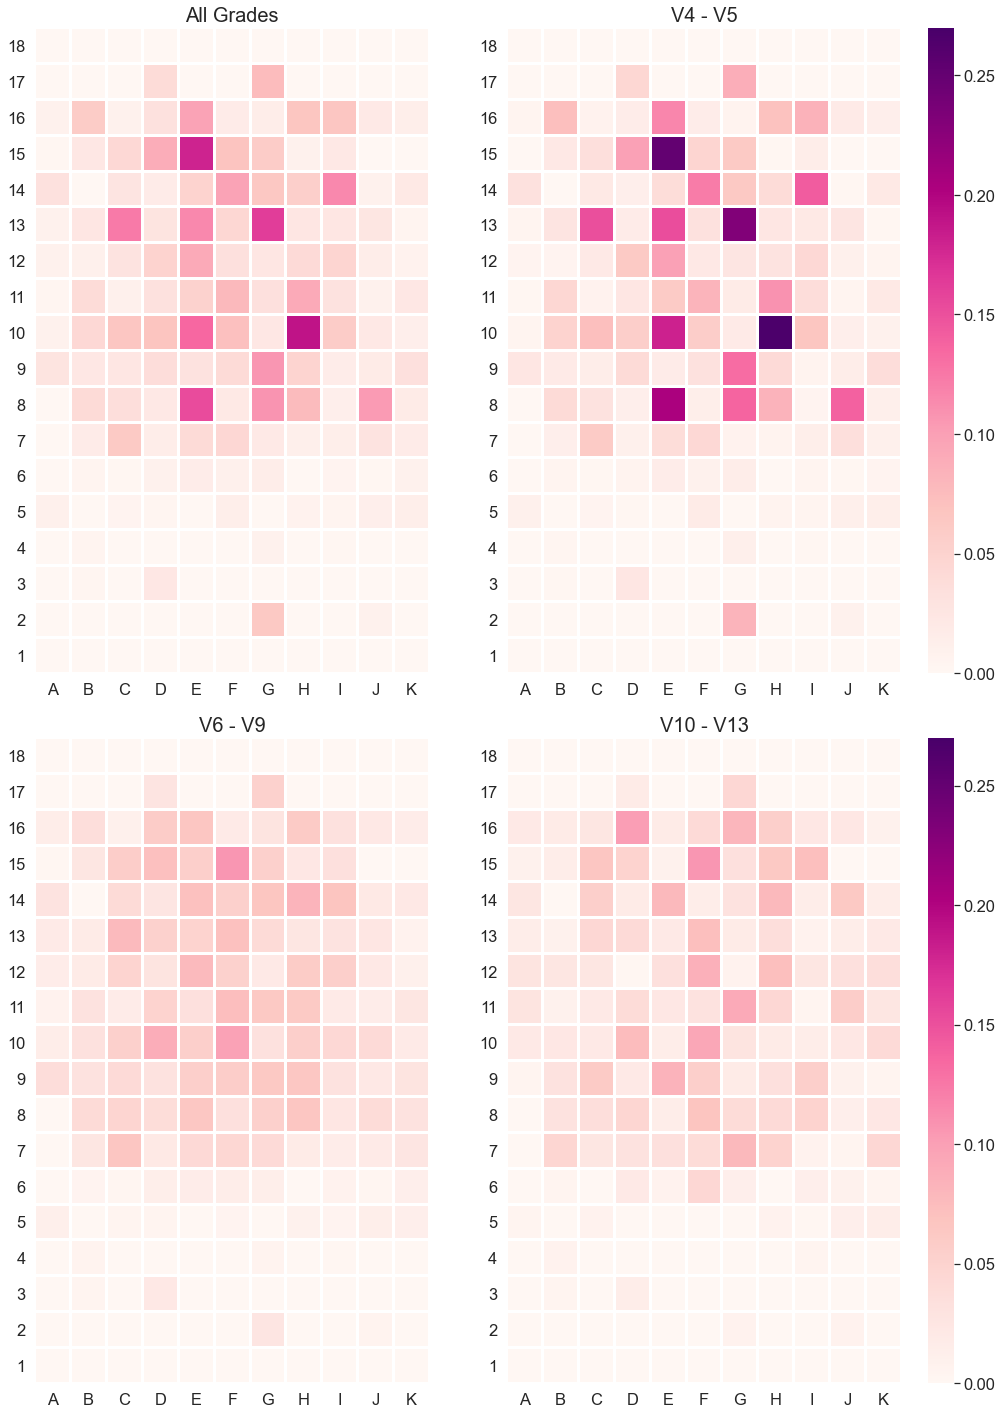

In [ ]:
fig = plt.figure(figsize=(15, 20))
sns.set(font_scale=1.5)

x_list = ['A','B','C','D','E','F','G','H','I','J','K']

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.heatmap(heat_all, ax=ax1, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v4_5, ax=ax2, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})
sns.heatmap(heat_v6_9, ax=ax3, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v10_13, ax=ax4, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})

ax1.set_yticklabels(range(18, 0, -1),rotation=0)
ax2.set_yticklabels(range(18, 0, -1),rotation=0)
ax3.set_yticklabels(range(18, 0, -1),rotation=0)
ax4.set_yticklabels(range(18, 0, -1),rotation=0)

ax1.set_title('All Grades', fontsize=20)
ax2.set_title('V4 - V5', fontsize=20)
ax3.set_title('V6 - V9', fontsize=20)
ax4.set_title('V10 - V13', fontsize=20)

plt.show()

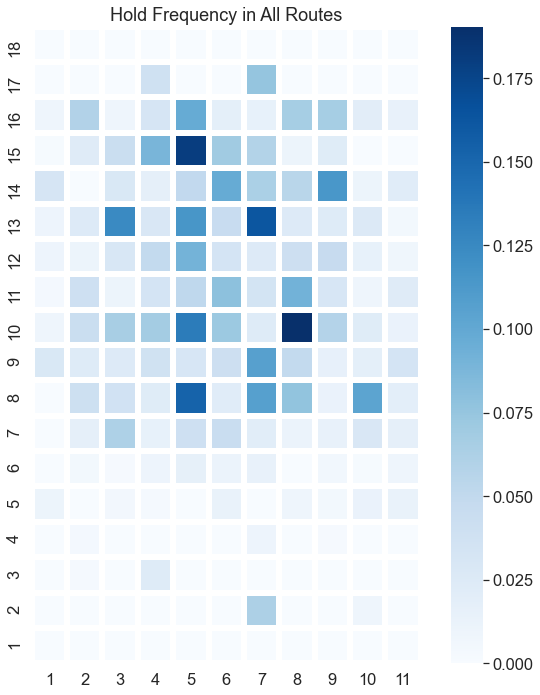

In [ ]:
# plot individual graphs
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4 = heat_matrix(mb_2016, [0])

plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_all, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in All Routes')
plt.show()

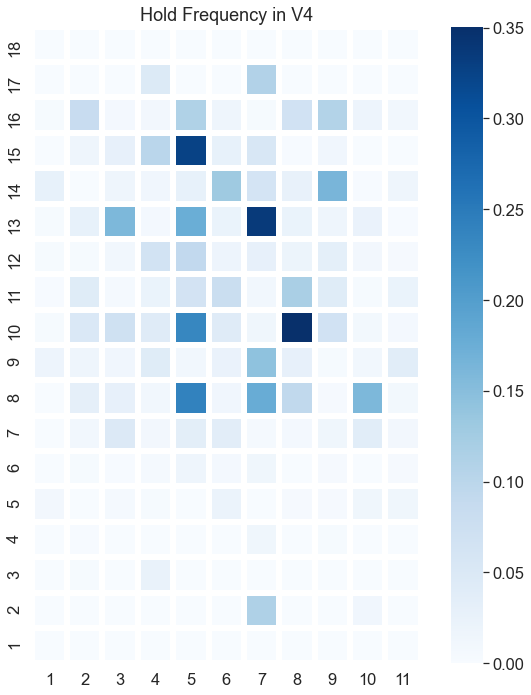

In [ ]:
plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_v4, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in V4')
plt.show()